In [1]:
import warnings
warnings.filterwarnings('ignore')

import librosa
import librosa.display
import sklearn
import matplotlib.pyplot as plt

# import module yang dibutuhkan

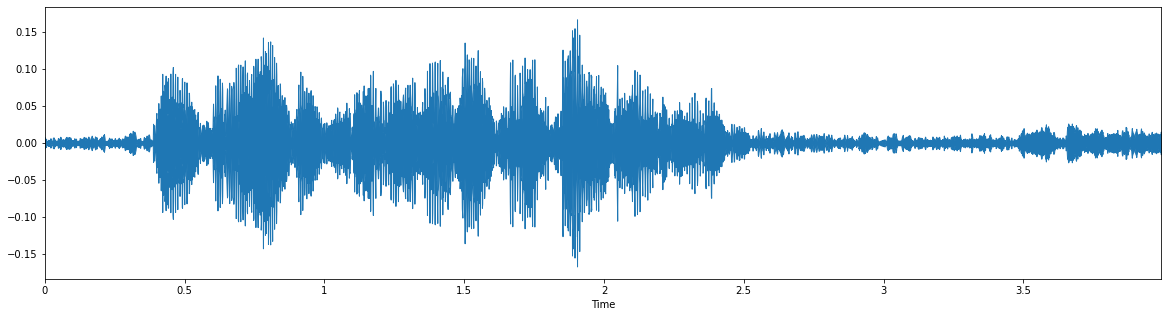

In [3]:
# panggil dir audio yang ingin di sampling pertama
file_path = r'C:\Users\prio\Desktop\Angeline\artificial\audio\prio_217.wav'
# keluarkan data audio dan ( sr = sample rate )
audio,sr = librosa.load(file_path)
# buat view menjadi lebih besar ( x,y )
plt.figure(figsize=(20, 5))
# tampilkan audio dengan librosa
librosa.display.waveplot(audio,sr=sr)

In [4]:
import IPython.display as ipd
# ( opsional ) kalau ingin memutar audio dir

In [5]:
ipd.Audio(file_path)
# pakai IPython.display module untuk memutar audio

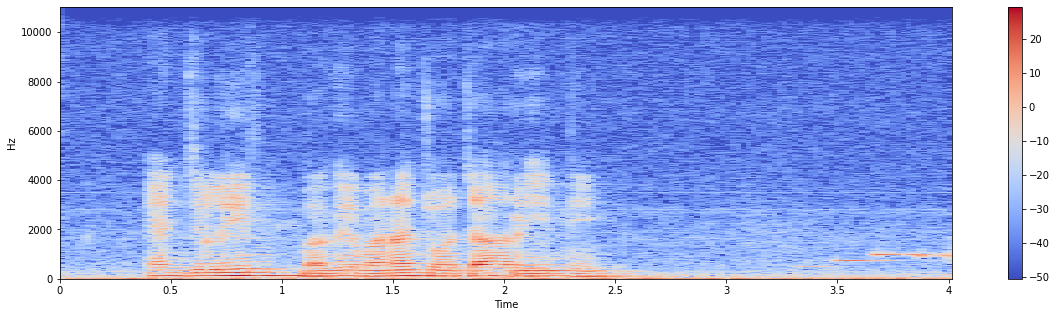

In [6]:
# gunakan module librosa untuk menghasilkan amplitude spectrogram dengan technik Short-time Fourier transform dari data audio yang sebelumnya di olah
X = librosa.stft(audio)
# convert amplitude spectrogram menjadi dB-scaled spectrogram
Xdb = librosa.amplitude_to_db(abs(X))
# buat dulu ukuran gambarnya
plt.figure(figsize=(20, 5))
# tampilkan spectogram dari data audio dengan librosa.display.specshow ( y = Xdb, sample rating = sr , x_axis = label X , y_axis = Label Y)
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
# jangan lupa kasih Legend pada gambar di sebelah kanan supaya dapat di amati lebih jelas
plt.colorbar()

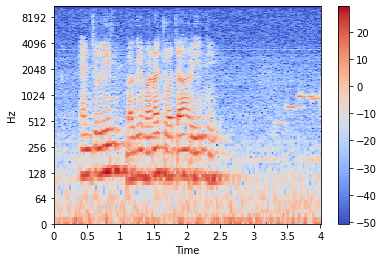

In [7]:
# Gunakan ukuran gambar default yang lebih kecil dari diatas apabila ingin melihat data lebih padat
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

shape mfcc =  (20, 173)


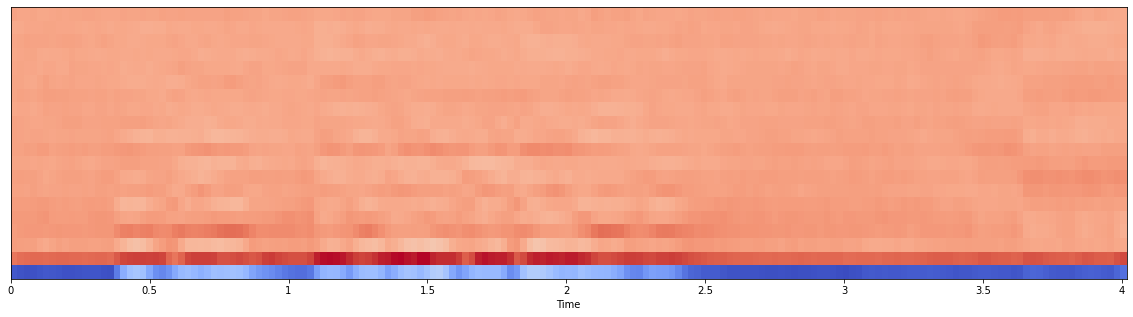

In [8]:
# Mel-Frequency Cepstral Coefficient
plt.figure(figsize=(20,5))

# buat variabel mfccs dengan value = librosa mfcc ( x = data audio, sr= sample rate )
mfccs = librosa.feature.mfcc(audio, sr=sr)

# untuk dapatkan shape pada mfcc dapat melakukan perintah print
print(f'shape mfcc =  {mfccs.shape}')

# tamplikan mfcc
librosa.display.specshow(mfccs, sr=sr, x_axis='time')

In [9]:
# lakukan scaling dari hasil mfcc
mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print(mfccs.mean(axis=1))
print(mfccs.var(axis=1))

# plt.figure(figsize=(20,8))
# librosa.display.specshow(mfccs, sr=sr, x_axis='time')

[ 2.2050273e-08  0.0000000e+00  1.1025136e-08 -1.1025136e-08
 -2.7562841e-09  1.1025136e-08 -5.5125682e-09  2.2050273e-08
  0.0000000e+00  0.0000000e+00  1.1025136e-08  1.1025136e-08
  2.7562841e-09  0.0000000e+00 -1.1025136e-08  0.0000000e+00
 -1.1025136e-08 -1.1025136e-08  2.2050273e-08  2.7562841e-09]
[1.         1.         0.9999998  1.         0.99999994 0.9999998
 0.9999998  1.         1.         1.         1.         1.
 1.         1.0000001  1.         0.9999998  1.         0.99999994
 1.0000001  1.        ]


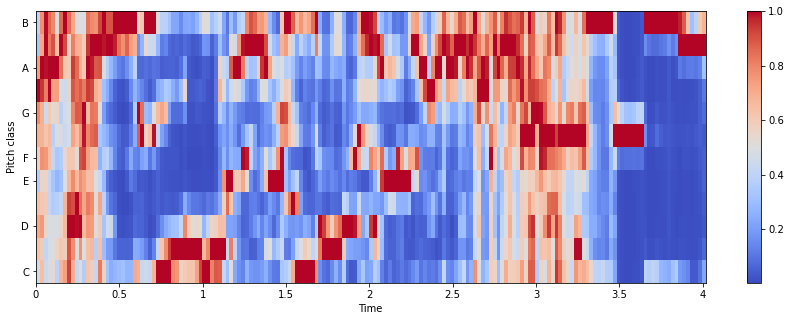

In [10]:

hop_length = 512
chromagram = librosa.feature.chroma_stft(audio, sr=sr, hop_length=hop_length)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm')
plt.colorbar()